<a href="https://colab.research.google.com/github/nickroh/datascience/blob/master/%EB%85%B8%EA%B1%B4%ED%98%B8_linear_reg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. 지도학습 회귀


5. 1 1차원 직선 모델


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X=np.array([2,3,6,7,8,10,14,15,16,17,18])
T=np.array([2,4,4,9,10,6,10,13,18,14,16])



입력 X 에 Target 변수의 값(label)이 주어졌다. 두 변수의 관계를 파악하기 위해 우리가 할 일은 ?

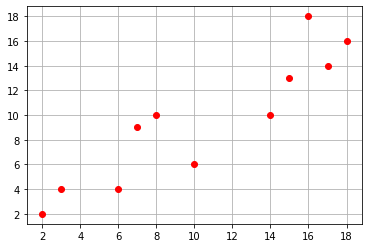

In [0]:
plt.figure()
plt.grid(True)
plt.plot(X, T, "or")
plt.show()



  
J=MSE  가 주어졌을 때 J 의 기울기를 구하는 함수  dmse_line(x,t,w) 
코딩하시오.


In [0]:
# p177 평균 제곱 오차 J 의 기울기

def dmse_line(X,T,w):
  y=w[0]*X+w[1]
  d_w0=2*np.mean((y-T)*X)
  d_w1=2+np.mean(y-T)
  return d_w0, d_w1

In [0]:
d_w=dmse_line(X,T,[10,165])
print(np.round(d_w, 1))

[6048.7  262.8]


x=[-1,0,1], t=[1,1,2]
초기 매개변수 w=[1,1] 에서 J 의 기울기를 구하시오



In [0]:
x=np.array([-1,0,1])
t=np.array([1,1,2])
d_w=dmse_line(x,t,[1,1])
print(np.round(d_w, 2))

[0.67 1.67]


두번째 매개변수 [1,1]+학습률*(-(d_w)) 에서 기울기를 구하시오. (여기서 학습률=1/2)


In [0]:
dmse_line
w_t1=np.array([1,1])-0.5*np.array(d_w)
print(w_t1)
dmse_line(x,t,w_t1)

[0.66666667 0.16666667]


(0.22222222222222232, 0.8333333333333333)

In [0]:
# 초기 매개변수를 설정하고 반복하여 최종 매개변수, 기울기,  매개변수 리스트 를 반환한다.------------------------------------
def fit_line_num(x, t):
    w_init = [2, 2] # 초기 매개 변수
    alpha = 0.0001 # 학습률
    i_max = 10000000  # 반복의 최대 수
    eps = 0.01   # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


위의 기울기하강법을 이용한 매개변수 수정의 결과를 확인하고 결과를 개선해보시오.


In [0]:
#when alpha=0.01
print(np.round(d_w, 2))

[0.67 1.67]


In [0]:
#alpha=0.5
print(np.round(d_w, 2))

[0.67 1.67]


In [0]:
#let w_init=[-1,1]
print(np.round(d_w, 2))

[0.67 1.67]


In [0]:
#let w_init=[0,1]
print(np.round(d_w, 2))

[0.67 1.67]


In [0]:
W0,W1, dMSE, W_history=fit_line_num(x, t)
print("최종 매개변수: ",W0, W1)
print("최종 기울기: ",dMSE)
print(" 변화 : ", W_history )

최종 매개변수:  0.5008735911118906 -0.656668465251112
최종 기울기:  (0.0011649434749842296, 0.009999201335688213)
 변화 :  [[ 2.          2.        ]
 [ 1.9998      1.99973333]
 [ 1.99960003  1.99946669]
 ...
 [ 0.50087394 -0.65666547]
 [ 0.50087382 -0.65666647]
 [ 0.50087371 -0.65666747]]


생각해볼것: W_history 를 100 번마다 출력하도록 코드를 만드시오. 

       p178 메인 이후 시각화 를 시도해보시오. 

       초기 매개변수를 다르게 하거나 학습률을 변경해보시오.


##과제 : 아래 X, T : 경사하강법
초기위치. 학습률, 반복횟수 (기울기가 작아서 종료한 경우 기울기의 절대값), 회귀직선의 식, 회귀직선의 RMSE 을 
출력하고 데이터의 산점도와 회귀직선을 동일한 figure 에 그리고 **Capture 화일**을 이 디렉토리에 올리시오. 

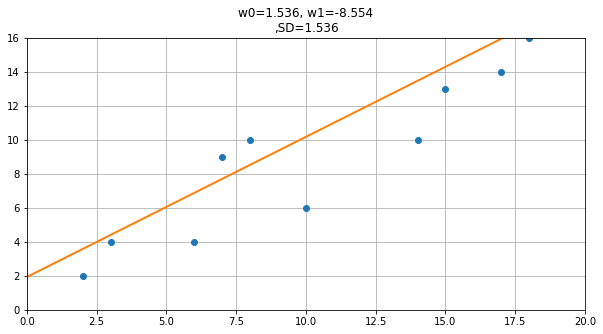

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

X=np.array([2,3,6,7,8,10,14,15,16,17,18])
T=np.array([2,4,4,9,10,6,10,13,18,14,16])

W0,W1, dMSE, W_history=fit_line_num(X, T)


fig = plt.figure(figsize=(10, 5)) 
ax = plt.axes(xlim=(0,20), ylim=(0,16))
plt.plot(X,T,marker = 'o', linestyle = 'None')
plt.title("w0={0:.3f}, w1={1:.3f}\n,SD={0:.3f}".format(W0,W1,np.sqrt(mse)))
ax.grid(True)

line, = ax.plot([],[],lw=2)

def init():
  line.set_data(([],[]))
  return(line,)

def animate(t):
  x = np.linspace(0,20,1000)
  y = np.array(x*W_history[t,0]+W_history[t,1])

  line.set_data(x,y)
  return (line,)
def mse_line(x,t,w):
  y=w[0]*x+w[1]
  mse=np.mean((y-t)**2)
  return mse

W=np.array([W0,W1])
mse=mse_line(X,T,W)

ani = animation.FuncAnimation(fig , animate, interval = 50, init_func=init, frames=100, blit=True, repeat=True, )
HTML(ani.to_html5_video())
